## Hyperparameters

In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

To address that problem, we need to perform a validation process. In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

sns.set_style(style="whitegrid") # set style

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9066666666666666

### Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. Visually, it might look something like this:

Here we do two validation trials, alternately using each half of the data as a holdout set [**two-fold cross-validation**]. Using the split data from before, we could implement it like this:



In [11]:
y2_predict = model.fit(X_train, y_train).predict(X_test)
y1_predict = model.fit(X_test, y_test).predict(X_train)
accuracy_score(y_train, y1_predict), accuracy_score(y_test, y2_predict)

(0.96, 0.9066666666666666)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=2)

array([0.94666667, 0.94666667])

In [15]:
# We can extend this idea, now with five-fold cross-validation:

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the cross_validation module. For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as **leave-one-out cross validation**, and can be used as follows:

In [18]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)
scores


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 samples, the leave one out cross-validation yields scores for 150 trials, and the score indicates either successful (1.0) or unsuccessful (0.0) prediction. 

In [20]:
scores.mean()

0.96

## Selecting the Best Model

If our estimator is underperforming, how should we move forward? There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model 
- Gather more training samples
- Gather more data to add features to each sample


NameError: name 'make_data' is not defined

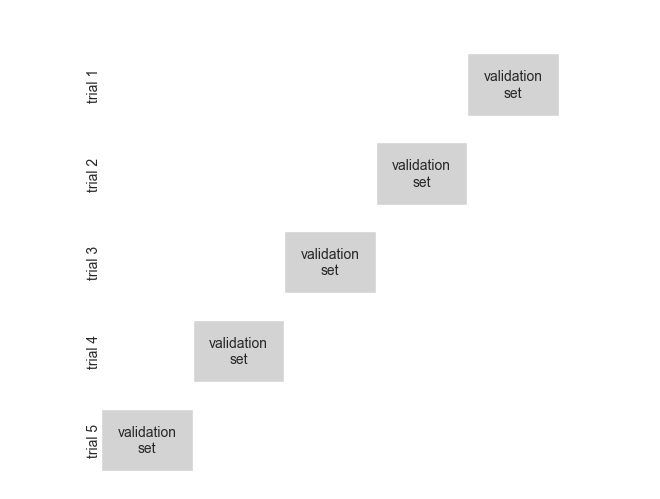

In [ ]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(5, ax, textprop=dict(size=10))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator= model, X= X, y = y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave-one-out cross validation

we might wish to go to the extreme case in which our number of folds is equal to the number of data point: that is, we train on all points but one in each trial

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)
scores


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Taking the mean of these gives an estimate of the error rate

scores.mean()

0.96

### Selecting the Best Model

if our estimator is underperforming, how should we move forward? There are several possible answers:

1. Use a more complicated/more flexible model
2. Use a less complicated/less flexible model
3. Gather more training samples
4. Gather more data to add features to each sample

These issues are some of the most important aspects of the practice of machine learning.  

### The Bias-variance trade-off

The Bias-variance trade-off Fundamentally, the question of "the best model" is about finding a spot in the tradeoff between bias and variance.

From the scores associated with these two models, we can make an observation that holds more generally:

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure


In [ ]:
# Validation curves in Scikit-Learn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


In [ ]:
# Now let's create some data to which we will fit our model:

import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

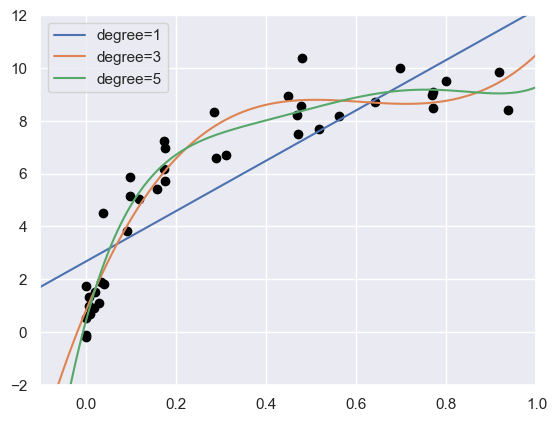

In [ ]:
# We can now visualize our data, along with polynomial fits of several degrees:

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

# what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?

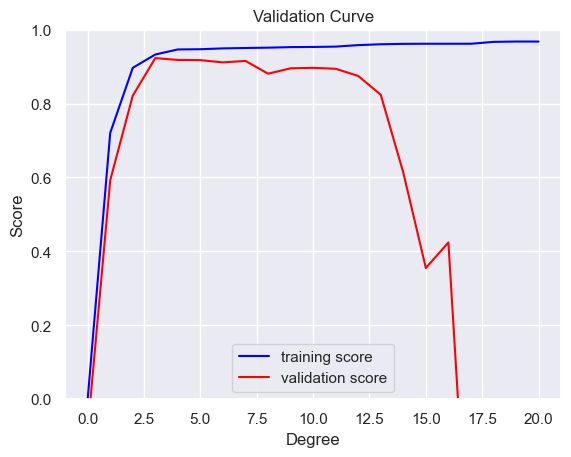

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de grados
degree = np.arange(0, 21)

# Realizar la curva de validación
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)

# Graficar los resultados
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation Curve');

# From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial

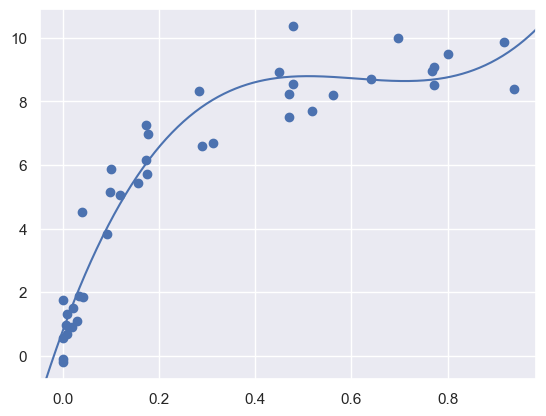

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);